> # Athens Weather Analysis

In Athens, the capital of Greece, the climate is Mediterranean, with mild, moderately rainy winters and hot, sunny summers.
The city is located near the 38th parallel. It covers a wide area in the plain of Attica, which is surrounded by mountains on three sides, and overlooks the sea to the south.

Even though the winter is mild, from December to mid-March, sometimes there can be outbreaks of cold air from the Balkan Peninsula, which can bring cold and rain for some days, and sometimes even snow. Snowfalls occur more easily in the northern part of the city. At the city center, the Acropolis is whitened with snow more easily than the lower surrounding areas. A particularly abundant snowfall, which also affected the southern and coastal areas, occurred in February 2008. In that case, the temperature dropped to -4 °C (25 °F).

Summer is hot and sunny. In fact, Athens in summer is the hottest capital of Europe. In July and August, the temperature quite easily reaches 35/36 °C (95/97 °F), but during heatwaves, it can reach as high as 40 °C (104 °F). The highest record is 43 °C (109.5 °F) and was set in August 2021.

Precipitation is not abundant, since it amounts to 365 millimeters (14.3 inches) per year, and follows the Mediterranean pattern, with a maximum from November to February and a minimum in summer, when clear skies prevail and there are only occasional thunderstorms.

Our goal in this project is to explore the weather in Athens over a period of more than 50 years (1955-2020).

> ## Introduction

### Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

> ## NOAA - Data Collection & Cleansing

* The data has been downloaded from the [National Oceanic and Atmospheric Administration's National Centers for Environmental Information (NOAA)](https://www.ncdc.noaa.gov/cdo-web/search).

* As we focus on Athens, we will use the data from the Hellinikon weather station, which refers to the period from 1955 to 2020. 

* In order to fill any missing values, we are going to use an alternative dataset from [Hellenic Data Service (HelixDATA)](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f) which covers only the period from 2010 to 2019.

Each record of the **NOAA** dataset consists of all the observations (values) available for a given station-day:

* **STATION**: The station identification code (for a complete list of stations and their metadata click here)
* **NAME**: The name of the station (usually city or airport name)
* **LATITUDE**: The latitude of the station
* **LONGITUDE**: The longitude of the station
* **ELEVATION**: The elevation above mean sea level (tenths of meters)
* **DATE**: The year of the record (4 digits), followed by month (2 digits) and day (2 digits)
* **PRCP**: Precipitation (mm)
* **SNWD**: Snow depth (mm)
* **TAVQ**: Average temperature (°C)
* **TMAX**: Maximum temperature (°C)
* **TMIN**: Minimum temperature (°C)

**Read Data**

In [2]:
# read the data
noaa = pd.read_csv('./data/noaa_data.csv', parse_dates=['DATE'])

# convert columns to lowercase
noaa.columns = noaa.columns.str.lower()

# preview
noaa.head()

,station,name,date,prcp,snwd,tavg,tmax,tmin
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,NaN,18.5,10.2
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,NaN,14.4,7.0
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,NaN,15.8,9.6
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,NaN,18.8,7.3
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,NaN,17.9,8.4


**Data Infos**

In [3]:
noaa.shape

(23251, 8)

In [4]:
noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23251 entries, 0 to 23250
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  23251 non-null  object        
 1   name     23251 non-null  object        
 2   date     23251 non-null  datetime64[ns]
 3   prcp     22773 non-null  float64       
 4   snwd     30 non-null     float64       
 5   tavg     20940 non-null  float64       
 6   tmax     22307 non-null  float64       
 7   tmin     22418 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.4+ MB


**Check for missing values**

In [5]:
print(f'Total missing values per column:\n{noaa.isnull().sum()} \n\n\
There are {noaa.isnull().sum().sum()} missing values in total.')

Total missing values per column:
station        0
name           0
date           0
prcp         478
snwd       23221
tavg        2311
tmax         944
tmin         833
dtype: int64 

There are 27787 missing values in total.


**Check for missing dates**

* We will check our data for missing dates from 01/01/1995 to 31/12/2020

In [6]:
# find all the dates from 01/01/1995 to 31/12/2020
all_dates = pd.date_range(start='1955-01-01', end='2020-12-31')

# find missing dates
missing_dates = all_dates.difference(noaa.date)

# print result
print( f'There are {(len(missing_dates))} missing dates from 01/01/1995-31/12/2020')

There are 856 missing dates from 01/01/1995-31/12/2020


**Fix the dates**

* We will add the missing dates in our dataset and we will put NaN as value in order to retain the daily snapshots.

In [7]:
noaa = noaa.set_index('date').asfreq('D').reset_index()

fixed_dates = all_dates.difference(noaa.date)

print( f'There are {(len(fixed_dates))} missing dates from 01/01/1995-31/12/2020')

There are 0 missing dates from 01/01/1995-31/12/2020


**Check for outliers**

* We notice that there are some records in our dataset where the following applies:
    * tavg > tmax

    * tavg < tmin

In [8]:
noaa[(noaa.tavg > noaa.tmax) | (noaa.tavg < noaa.tmin)]

,date,station,name,prcp,snwd,tavg,tmax,tmin
6683,1973-04-19,GR000016716,"HELLINIKON, GR",4.2,NaN,12.6,14.4,12.8
9141,1980-01-11,GR000016716,"HELLINIKON, GR",0.0,NaN,9.5,11.6,9.6
9495,1980-12-30,GR000016716,"HELLINIKON, GR",0.8,NaN,7.3,9.0,7.8
9830,1981-11-30,GR000016716,"HELLINIKON, GR",0.5,NaN,12.4,16.3,12.5
9914,1982-02-22,GR000016716,"HELLINIKON, GR",13.9,NaN,9.5,11.2,9.6
10549,1983-11-19,GR000016716,"HELLINIKON, GR",1.3,NaN,10.3,11.6,10.4
11358,1986-02-05,GR000016716,"HELLINIKON, GR",0.0,NaN,6.5,6.4,5.2
11666,1986-12-10,GR000016716,"HELLINIKON, GR",0.0,NaN,9.2,10.4,9.4
11733,1987-02-15,GR000016716,"HELLINIKON, GR",1.2,NaN,12.9,15.8,13.0
11739,1987-02-21,GR000016716,"HELLINIKON, GR",0.0,NaN,13.9,17.0,14.0


* This seems odd because it lacks coherence or relevance in actual situations
* We will assume that in these cases there has been some typing error, thus:
    * we will swap the values between **tavg** and **tmax** where **tavg > tmax**
    * we will swap the values between **tavg** and **tmin** where **tavg < tmin**
* To do this, we will find the indices where **tavg > tmax** or **tavg < tmin**
* Then, for the indices found, we will do the swap

**Fix the values**

In [9]:
# find indices where tavg > tmax
idx_max = noaa[noaa.tavg > noaa.tmax].index

# find indices where tavg < tmin
idx_min = noaa[noaa.tavg < noaa.tmin].index

# swap values between tavg and tmax, where tavg > tmax
noaa.loc[idx_max,['tavg','tmax']] = noaa.loc[idx_max,['tmax','tavg']].values

# swap values between tavg and tmin, where tavg < tmin
noaa.loc[idx_min,['tavg','tmin']] = noaa.loc[idx_min,['tmin','tavg']].values

> ## HDS - Data Collection & Cleansing

* As we mentioned earlier, we obtained the second dataset from the  [Hellenic Data Service (HelixDATA)](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f)
* We will use this dataset to fill in any missing values in the **NOAA** dataset
* The **HDS** dataset covers only the period from 2010-2019.

Each record of the **HDS** dataset consists of 14 observations (values) available for a given station-day:

* the date (YYYY-MM-DD)
* the mean, maximum and minimum temperature (°C)
* the mean, maximum and minimum humidity (%)
* the mean, maximum and minimum atmospheric pressure (hPa)
* the daily rainfall (mm)
* the mean wind speed, dominant wind direction and wind gust (km/h)


**Read Data**

In [10]:
# define column names
column_names = ['date','mean_temperature', 'max_temperature', 'min_temperature',
                'mean_humidity', 'max_humidity', 'min_humidity','mean_atm_pressure',
                'max_atm_pressure', 'min_atm_pressure','daily_rainfall','wind_speed',
                'dominant_wind_direction', 'wind_gust']

# read the data
hds = pd.read_csv('./data/hds_data.csv', names=column_names, parse_dates=['date'])

# preview
hds.head()

,date,mean_temperature,max_temperature,min_temperature,mean_humidity,max_humidity,min_humidity,mean_atm_pressure,max_atm_pressure,min_atm_pressure,daily_rainfall,wind_speed,dominant_wind_direction,wind_gust
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8


**Data Infos**

In [11]:
hds.shape

(3652, 14)

In [12]:
hds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     3652 non-null   datetime64[ns]
 1   mean_temperature         3652 non-null   object        
 2   max_temperature          3652 non-null   object        
 3   min_temperature          3652 non-null   object        
 4   mean_humidity            3652 non-null   float64       
 5   max_humidity             3652 non-null   int64         
 6   min_humidity             3652 non-null   int64         
 7   mean_atm_pressure        3652 non-null   float64       
 8   max_atm_pressure         3652 non-null   float64       
 9   min_atm_pressure         3652 non-null   float64       
 10  daily_rainfall           3652 non-null   float64       
 11  wind_speed               3652 non-null   float64       
 12  dominant_wind_direction  3652 non-

**Convert temperature values to numerical**

* The temperature columns are of object type
* Therefore, we need to change their type and convert them to numerical

In [13]:
# mean temperature
hds.mean_temperature = pd.to_numeric(hds.mean_temperature, errors='coerce')

# max temperature
hds.max_temperature = pd.to_numeric(hds.max_temperature, errors='coerce')

# min temperature
hds.min_temperature = pd.to_numeric(hds.min_temperature, errors='coerce')

**Check for missing values**

In [14]:
print(f'{hds.isna().sum()}\n\nThere are {hds.isna().sum().sum()} nan values in total.')

date                       0
mean_temperature           3
max_temperature            3
min_temperature            3
mean_humidity              0
max_humidity               0
min_humidity               0
mean_atm_pressure          0
max_atm_pressure           0
min_atm_pressure           0
daily_rainfall             0
wind_speed                 0
dominant_wind_direction    0
wind_gust                  0
dtype: int64

There are 9 nan values in total.


**Check for bad values**

In [15]:
hds.dominant_wind_direction.value_counts()

SSW    665
NNE    639
N      598
S      470
NE     250
W      231
SW     225
NNW    219
WSW    182
---     42
NW      34
SSE     32
WNW     25
E       15
ENE     11
SE       9
ESE      5
Name: dominant_wind_direction, dtype: int64

* There is a value for the dominant wind direction that is not correct. 
* We will replace those values with NAs

**Fix values**

In [16]:
hds = hds.replace('---',np.NaN)

### Join Dataframes

* Join noaa and hds dataframes
* We will join the dataframes on the **date** column

In [17]:
merged_data= pd.merge(noaa,hds,on='date', how='left')

merged_data

,date,station,name,prcp,snwd,tavg,tmax,tmin,mean_temperature,max_temperature,...,mean_humidity,max_humidity,min_humidity,mean_atm_pressure,max_atm_pressure,min_atm_pressure,daily_rainfall,wind_speed,dominant_wind_direction,wind_gust
0,1955-01-01,GR000016716,"HELLINIKON, GR",0.0,NaN,NaN,18.5,10.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955-01-02,GR000016716,"HELLINIKON, GR",2.0,NaN,NaN,14.4,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,NaN,15.8,9.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1955-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,NaN,18.8,7.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1955-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,NaN,17.9,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24102,2020-12-27,GR000016716,"HELLINIKON, GR",0.0,NaN,16.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24103,2020-12-28,GR000016716,"HELLINIKON, GR",6.6,NaN,14.8,18.2,11.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24104,2020-12-29,GR000016716,"HELLINIKON, GR",0.0,NaN,16.3,19.9,12.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24105,2020-12-30,GR000016716,"HELLINIKON, GR",0.0,NaN,16.4,19.9,14.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
merged_data.shape

(24107, 21)

In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24107 entries, 0 to 24106
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     24107 non-null  datetime64[ns]
 1   station                  23251 non-null  object        
 2   name                     23251 non-null  object        
 3   prcp                     22773 non-null  float64       
 4   snwd                     30 non-null     float64       
 5   tavg                     20940 non-null  float64       
 6   tmax                     22307 non-null  float64       
 7   tmin                     22418 non-null  float64       
 8   mean_temperature         3649 non-null   float64       
 9   max_temperature          3649 non-null   float64       
 10  min_temperature          3649 non-null   float64       
 11  mean_humidity            3652 non-null   float64       
 12  max_humidity             3652 no

**Check for missing values**

In [20]:
print(f'{merged_data.isna().sum()}\n\nThere are {merged_data.isna().sum().sum()} nan values in total.')

date                           0
station                      856
name                         856
prcp                        1334
snwd                       24077
tavg                        3167
tmax                        1800
tmin                        1689
mean_temperature           20458
max_temperature            20458
min_temperature            20458
mean_humidity              20455
max_humidity               20455
min_humidity               20455
mean_atm_pressure          20455
max_atm_pressure           20455
min_atm_pressure           20455
daily_rainfall             20455
wind_speed                 20455
dominant_wind_direction    20497
wind_gust                  20455
dtype: int64

There are 299745 nan values in total.


* Now that we've join the two dataframes, it's time to fill in some missing values
* Specifically, we will try to fill in some missing values from the noaa columns using the values from the corresponding hds columns
* Therefore, we will search the joined dataframe for records from 2010 to 2019 with missing values in the tavg column
* After we find (the indices of) these records, for each record that has a missing value in tavg column, we will fill in as follows:
    * replace **merged_data['prcp']** with **merged_data['daily_rainfall']**
    * replace **merged_data['tavg']** with **merged_data['mean_temperature']**
    * replace **merged_data['tmax']** with **merged_data['max_temperature']**
    * replace **merged_data['tmin']** with **merged_data['min_temperature']**
* The reason why we will replace other columns besides tavg, is to ensure consistency between the values in these columns for each record

**Get the number of missing values before filling in**

In [21]:
# get the number of nan values before filling in
nas_before = merged_data[(merged_data.date.dt.year > 2009) & (merged_data.date.dt.year < 2020)].isna().sum().sum()

**Fill in the missing values**

In [22]:
# define conditions
data_from_2010 = merged_data.date.dt.year > 2009
data_to_2019 = merged_data.date.dt.year < 2020
nas_mean_temp = merged_data.tavg.isna()

# get the indices of the records with nan values in tavg
idx = merged_data[data_from_2010 & data_to_2019 & nas_mean_temp].index

# fill in the nan values
merged_data['prcp'] = np.where(merged_data['prcp'].index.isin(idx), merged_data['daily_rainfall'], merged_data['prcp'])
merged_data['tavg'] = np.where(merged_data['tavg'].index.isin(idx), merged_data['mean_temperature'], merged_data['tavg'])
merged_data['tmax'] = np.where(merged_data['tmax'].index.isin(idx), merged_data['max_temperature'], merged_data['tmax'])
merged_data['tmin'] = np.where(merged_data['tmin'].index.isin(idx), merged_data['min_temperature'], merged_data['tmin'])

* Now that we have filled in some of the missing values, let's take a closer look at the dataframe
* We observe that there are still some records in which, although the tavg, tmax, tmin columns have values, prcp is still missing

In [23]:
# define new conditions
prcp_isna = merged_data.prcp.isna()
rain_notna = merged_data.daily_rainfall.notna()
tavg_notna = merged_data.tavg.notna()
tmax_notna = merged_data.tmax.notna()
tmin_notna = merged_data.tmin.notna()

# preview
merged_data[prcp_isna & rain_notna & tavg_notna & tmax_notna & tmin_notna][['prcp','tavg','tmax','tmin','daily_rainfall']]

,prcp,tavg,tmax,tmin,daily_rainfall
20248,NaN,23.4,27.4,18.6,0.6
20543,NaN,16.2,17.2,15.4,6.2
21998,NaN,12.0,14.0,10.6,6.0
22028,NaN,15.9,20.9,10.9,0.0
22031,NaN,17.8,23.9,12.8,0.0
22107,NaN,27.5,32.5,22.9,0.0
22145,NaN,28.9,35.3,23.5,0.0
22148,NaN,28.4,33.3,24.0,0.0
22150,NaN,26.7,30.7,22.4,0.0
22169,NaN,25.6,30.0,22.4,0.0


* We will get the indices of these records and fill in **prcp** with the **daily_rainfall** values

In [24]:
# get indices where the conditions are True
idx_prcp = merged_data[prcp_isna & rain_notna & tavg_notna & tmax_notna & tmin_notna].index

# fill in the nan values
merged_data['prcp'] = np.where(merged_data['prcp'].index.isin(idx_prcp), merged_data['daily_rainfall'], merged_data['prcp'])

**Get the number of missing values after filling in**

In [25]:
# get the number of nan values after filling in
nas_after = merged_data[data_from_2010 & data_to_2019].isna().sum().sum()

print(f'We filled in {nas_before - nas_after} values.')

We filled in 3428 values.


**Final noaa Dataframe**

* We managed to fill in as many missing values as possible in the records of the original noaa dataset
* Now we can move on to the next steps of our analysis
* However, we don't need all the columns for our analysis and therefore we will keep only those that interest us

In [26]:
# select columns to keep
to_keep = ('date', 'prcp', 'tavg', 'tmax', 'tmin', 'max_temperature', 'min_temperature', 'daily_rainfall')

# get the dataframe
noaa = merged_data.loc[:, to_keep]

# preview
noaa.head()

,date,prcp,tavg,tmax,tmin,max_temperature,min_temperature,daily_rainfall
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN


----

> ## Deviation of Summer Temperatures

* The Hellenic National Meteorological Service has published a report on extreme weather events for 2020, which is available [here](http://www.hnms.gr/emy/en/pdf/2020_GRsignificantEVENT_en.pdf)
* In page 7 of the report there is a graph showing the mean summer temperature deviation from a baseline of 1971-2000
* We will create our own version of the graph, using a baseline of 1974-1999
* Also, we will add the line that runs through the graph which is the 10 years rolling avarege of the deviation from the mean 

In [27]:
# preview of data
noaa.head()

,date,prcp,tavg,tmax,tmin,max_temperature,min_temperature,daily_rainfall
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN


* We will calculate the **Baseline mean summer temperature** from 1974 to 1999

In [28]:
# define conditions
data_from_1974 = noaa.date.dt.year > 1973
data_to_1999 = noaa.date.dt.year < 2000
summer_months = noaa.date.dt.month.isin([6,7,8])

#calculate mean summer temperature from 1974 to 1999
mean_summer_temp_from_1974_to_1999 = round(noaa[data_from_1974 & data_to_1999 & summer_months].tavg.mean(),1)

print(f'The mean summer temperature from 1974 to 1999 was {mean_summer_temp_from_1974_to_1999}.')

The mean summer temperature from 1974 to 1999 was 26.2.


* We will find the yearly mean summer temperature grouping by year (from 1955 to 2020)

In [29]:
# create a df to keep only summer months
summer_data = noaa[summer_months]

# preview
summer_data.head()

,date,prcp,tavg,tmax,tmin,max_temperature,min_temperature,daily_rainfall
151,1955-06-01,0.0,NaN,26.0,17.6,NaN,NaN,NaN
152,1955-06-02,0.0,NaN,26.4,17.0,NaN,NaN,NaN
153,1955-06-03,0.0,NaN,26.0,17.0,NaN,NaN,NaN
154,1955-06-04,0.0,NaN,26.5,18.9,NaN,NaN,NaN
155,1955-06-05,0.0,NaN,27.0,18.0,NaN,NaN,NaN


In [30]:
# group by year
grouped_data = summer_data.groupby(summer_data.date.dt.year)

# calculate mean summer temperature per year
mean_summer_temp_from_1955_to_2020 = grouped_data.tavg.mean()

print(f'The yearly mean summer temperatures per year are: \n\n {mean_summer_temp_from_1955_to_2020}.')

The yearly mean summer temperatures per year are: 

 date
1955          NaN
1956          NaN
1957    28.091935
1958    27.081522
1959          NaN
          ...    
2016    28.154348
2017    28.088043
2018    27.436957
2019    28.034783
2020    27.380435
Name: tavg, Length: 66, dtype: float64.


* We will calculate the yearly's mean temperature deviation from the baseline's mean by **substacting the mean summer temperature of each year from the mean summer temperature of the baseline**

In [31]:
# calculate the difference
tdiff = mean_summer_temp_from_1955_to_2020 - mean_summer_temp_from_1974_to_1999
tdiff

date
1955         NaN
1956         NaN
1957    1.891935
1958    0.881522
1959         NaN
          ...   
2016    1.954348
2017    1.888043
2018    1.236957
2019    1.834783
2020    1.180435
Name: tavg, Length: 66, dtype: float64

* Get the years with mean summer temperature above / below the baseline
    * If **tdiff > 0**, the mean summer temperature is above baseline
    * If **tdiff < 0**, the mean summer temperature is below baseline

In [32]:
# years with mean temperature above baseline
above_baseline = tdiff[tdiff.values > 0]

# years with mean temperature below baseline
below_baseline = tdiff[tdiff.values < 0]

* Compute the **10 years rolling average** of the deviation from the mean

In [33]:
# convert tdiff into a dataframe
tdiff_df = tdiff.to_frame()

# compute rolling average
# min periods=1  means that  10 years is one period
tdiff_df['rolling_avg_10'] = round(tdiff_df['tavg'].rolling(window=10,min_periods=1).mean(),1)

print(f'The 10 years rolling average of the deviation from the mean is: \n\n {tdiff_df.rolling_avg_10}.')

The 10 years rolling average of the deviation from the mean is: 

 date
1955    NaN
1956    NaN
1957    1.9
1958    1.4
1959    1.4
       ... 
2016    2.0
2017    2.0
2018    1.9
2019    2.0
2020    1.9
Name: rolling_avg_10, Length: 66, dtype: float64.


### Plot the graph

In [34]:
# set style
plt.style.use('ggplot')

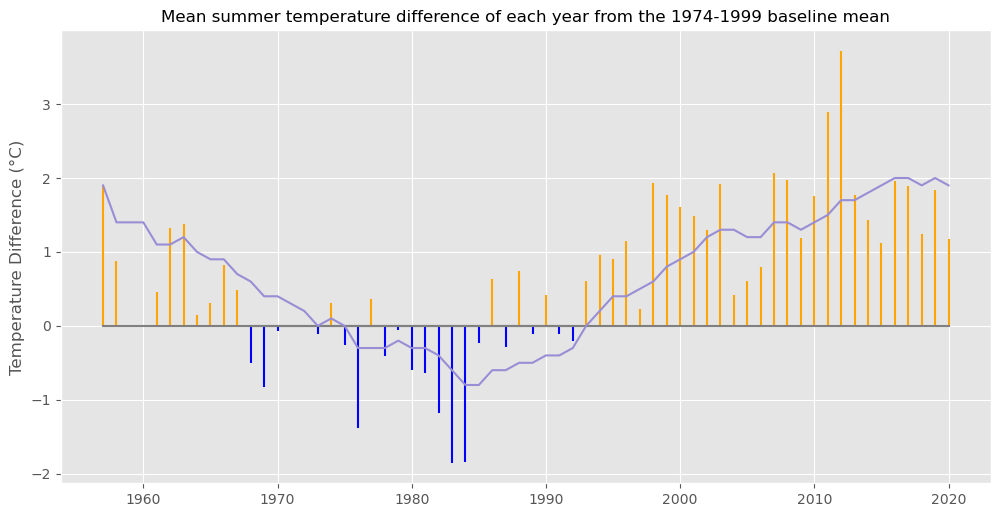

In [35]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

# plot years with mean temperature above baseline
ax1 = markers, stemlines1, baseline = plt.stem(above_baseline.index, above_baseline.values, markerfmt=' ', basefmt='grey')
ax1 = plt.setp(stemlines1, color='orange')

# plot years with mean temperature below baseline
ax2 = markers, stemlines, baseline = plt.stem(below_baseline.index, below_baseline.values, markerfmt=' ', basefmt='grey')
ax2 = plt.setp(stemlines, color='blue')

# plot the 10 years rolling average
ax3 = tdiff_df.rolling_avg_10.plot()

# set tick params
ax.tick_params(axis='both', labelsize=10)

# set label params
ax.set_xlabel(None)
ax.set_ylabel('Temperature Difference (°C)', size=12)

# set title
ax.set_title('Mean summer temperature difference of each year from the 1974-1999 baseline mean', size=12)

plt.savefig('./graphs/summer_temperatures.svg')
plt.show()

### General conclusion

* Prior to 1992, the mean summer temperature exhibited a comparatively lower magnitude, subsequently undergoing an ascendant trajectory and culminating in a localized zenith in 2012, marking the warmest summer in recorded history.
* The second highest summer temperature in Greece was observed in 2011.
* Notably, the initial three decadal periods (where one period spans a decade) are characterized by a declining trend in the rolling average, indicative of cooler summers. In stark contrast, the subsequent three periods manifest an increasing trend, suggestive of warmer summer temperatures.
* This discernible shift is attributed to the aftermath of global warming, predominantly influenced by anthropogenic activities.

---

> ## Evolution of Daily Temperatures

After we analyzed the annual average temperatures of summer, we will go deeper into the daily basis, to understand the evolution of daily temperatures over the years.

* We will get the average temperature for each year for the full period from 1955 to 2020
* We will then create a plot showing the daily temperature for each year
* The line corresponding to each year will be smoothed by using a 30 days rolling average
* The lines are colored from light orange to dark orange, progressing through the years in ascending order
* On that plot you will overlay a black line showing the average daily temperature for the baseline period of 1974-1999
* The line will also be smoothed usng a 30 days rolling average

In [36]:
noaa.head()

,date,prcp,tavg,tmax,tmin,max_temperature,min_temperature,daily_rainfall
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN


### Smooth mean daily temperatures

* We will concentrate in smoothing the avg daily temperature by using a **30 days rolling average**

In [37]:
# copy noaa df
daily_temp_df = noaa.copy()

# add year and day of year as columns
daily_temp_df['year'] = daily_temp_df.date.dt.year
daily_temp_df['doy'] = daily_temp_df.date.dt.dayofyear

# compute the rolling average of 30 days
daily_temp_df['Average Daily Temperature'] = daily_temp_df['tavg'].rolling(window=30,min_periods=1).mean()

# preview
daily_temp_df.head()

,date,prcp,tavg,tmax,tmin,max_temperature,min_temperature,daily_rainfall,year,doy,Average Daily Temperature
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN,1955,1,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN,1955,2,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN,1955,3,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN,1955,4,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN,1955,5,NaN


* We will concentrate in smoothing the avg daily temperature for the **baseline period 1974-1999**, by using a **30 days rolling average**

In [38]:
# get the baseline dataframe
baseline_df = noaa[data_from_1974 & data_to_1999]

# calculate the baseline average daily temperature grouped by day of year
baseline_mean_daily = baseline_df.groupby([baseline_df.date.dt.dayofyear]).mean()['tavg']

# convert series to dataframe
baseline_mean_daily = baseline_mean_daily.to_frame().reset_index()

# calculate the 30-day rolling average of the baseline average daily temperature
baseline_mean_daily['rolling_avg_30_days'] = baseline_mean_daily.tavg.rolling(window=30,min_periods=1,).mean()

# preview
baseline_mean_daily.head()

,date,tavg,rolling_avg_30_days
0,1,10.365385,10.365385
1,2,10.707692,10.536538
2,3,10.215385,10.429487
3,4,9.634615,10.230769
4,5,9.919231,10.168462


### Plot the graph

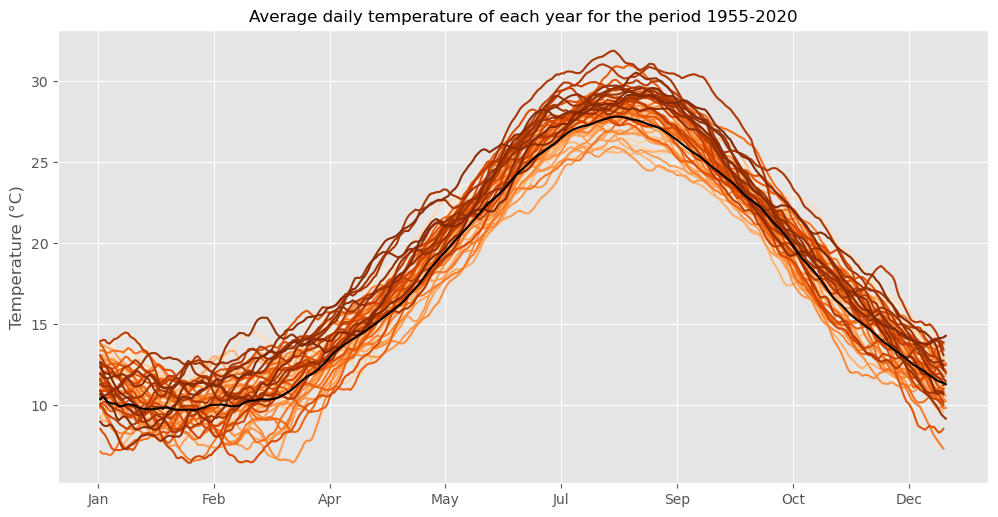

In [39]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

# define colors
sequential_colors = sns.color_palette("Oranges", 66)

# plot years with mean temperature below baseline
fig = sns.lineplot(data=daily_temp_df, x='doy',y='Average Daily Temperature', hue='year', \
                   ci=None , palette=sequential_colors , legend=False, estimator='median')

# plot the 10 years rolling average
sns.lineplot(data=baseline_mean_daily, x='date',y='rolling_avg_30_days',ci=None,color='k')

# set months as xlabels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# set label params
ax.set_xlabel(None)
ax.set_ylabel('Temperature (°C)', size=12)

# set title
ax.set_title('Average daily temperature of each year for the period 1955-2020', size=12)

plt.savefig('./graphs/daily_temperatures.svg')
plt.show()

### General conclusion


* Continuing from the average summer temperatures, it is noteworthy that the average daily temperatures increase over the years from spring to summer. In that period, the light orange lines are below the rolling average and the dark orange lines are above, reaching a local maximum in the last 10 years.
* Also, there is a seasonality on a yearly level which is logical. On winter the smoothed daily averages are lower, on spring start to rise and reach the peak on the summer months. Then, on autumn coming down to reach the lowest degrees on the next winter.
* In general, we could say that in Greece, the average daily temperatures have risen since the pre-industrial era, at a rate that has been rising for the past 10 years ( The darker lines are above the rolling average).

> ## Extreme Temperature Events

In the sequel of the yearly and daily analysis of the avg temperature, we are going to examine the extreme temperature events

* Another mesure used by climatologists is the number of extreme events
* Extreme events are defined as those beyond 5% or 10% from the expected value
* We will deal with extreme heat events going 10% above the baseline
* You will count the number of extreme temperature events per year, compared to the baseline of 1974-1999
* The vertical axis is the percentage of extreme heat events calculated over the number of observations for each year
* The gray line in the middle is the average percentage of extreme tempearture events of the baseline
* The blue colour is used for those years where the percentage is below the baseline; otherwise the colour is orange

In [40]:
noaa.head()

,date,prcp,tavg,tmax,tmin,max_temperature,min_temperature,daily_rainfall
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN


### Find the yearly number of all observations

In [41]:
# count the number of observations per year
yearly_obs = noaa.groupby([noaa.date.dt.year]).count()['tavg']

# convert series to dataframe
yearly_obs = yearly_obs.to_frame().reset_index()

# rename column
yearly_obs = yearly_obs.rename(columns={'date': 'year','tavg':'num_of_events'})

# preview
yearly_obs.head()

,year,num_of_events
0,1955,0
1,1956,0
2,1957,184
3,1958,365
4,1959,0


### Count the number of extreme events of the baseline period

In [42]:
# get the baseline dataframe
baseline_df = noaa[data_from_1974 & data_to_1999]

# calculate the baseline average daily temperature grouped by day of year
baseline_mean_daily = baseline_df.groupby([baseline_df.date.dt.dayofyear]).mean()['tavg']

# convert series to dataframe
baseline_mean_daily = baseline_mean_daily.to_frame().reset_index()

# rename column
baseline_mean_daily = baseline_mean_daily.rename(columns={'date': 'doy','tavg':'baseline_mean'})

# preview
baseline_mean_daily

,doy,baseline_mean
0,1,10.365385
1,2,10.707692
2,3,10.215385
3,4,9.634615
4,5,9.919231
...,...,...
361,362,10.261538
362,363,10.653846
363,364,11.011538
364,365,11.165385


### Count the number of extreme events based on the fact that they are going 10% above the baseline

   * We will join the daily level average temperature of each year with all the observations
   * Then, we will use as a unique key the days of years, so we add it in the df
   * After that we group by the year to count the number of extreme events

In [43]:
# copy noaa df
all_events = noaa.copy()

# add day of year as column
all_events['doy'] = all_events.date.dt.dayofyear

# join all events df with the df having the baseline mean of each day
extreme_events = pd.merge(all_events,baseline_mean_daily, on = 'doy' )

# keep only events that are 10% above the baseline
extreme_events = extreme_events[extreme_events.tavg > extreme_events.baseline_mean*1.1]

# count the number of extreme events per year
extreme_events = extreme_events.groupby([extreme_events.date.dt.year]).count()['tavg']

# convert series to dataframe
extreme_events = extreme_events.to_frame().reset_index()

#rename columns
extreme_events = extreme_events.rename(columns={'date':'year','tavg': 'num_of_extreme_events'})

# preview
extreme_events

,year,num_of_extreme_events
0,1957,50
1,1958,134
2,1961,136
3,1962,154
4,1963,142
...,...,...
56,2016,158
57,2017,169
58,2018,168
59,2019,159


### Compute the percentage of extreme heat events calculated over the number of observations for each year

* We will join the dataframe which have all the observations with the dataframe having the extreme heat events
* Calculate the percentage

In [44]:
# join the dataframe which have all the observations with the dataframe having the extreme heat events
extreme_events = pd.merge(yearly_obs,extreme_events,on='year', how='left')

# calculate the percentage
extreme_events['extreme_percentage'] = extreme_events.num_of_extreme_events/extreme_events.num_of_events

#preview
extreme_events.head()

,year,num_of_events,num_of_extreme_events,extreme_percentage
0,1955,0,NaN,NaN
1,1956,0,NaN,NaN
2,1957,184,50.0,0.271739
3,1958,365,134.0,0.367123
4,1959,0,NaN,NaN


### Get the years with percentage of extreme events above or below baseline

* Calculate the average of diviations of the baseline period (1974-1999)
* Find the events that are above or below the baseline

In [45]:
# calculate the average of diviations of the baseline period (1974-1999)
baseline_heat_mean = extreme_events.set_index('year').loc[1974:1999,'extreme_percentage'].mean()

baseline_heat_mean

0.2481314415207134

In [46]:
# find events that are above or below the baseline
above_baseline = extreme_events[extreme_events.extreme_percentage > baseline_heat_mean].set_index('year')
below_baseline = extreme_events[extreme_events.extreme_percentage < baseline_heat_mean].set_index('year')

### Plot the graph

In [47]:
# set style
plt.style.use('ggplot')

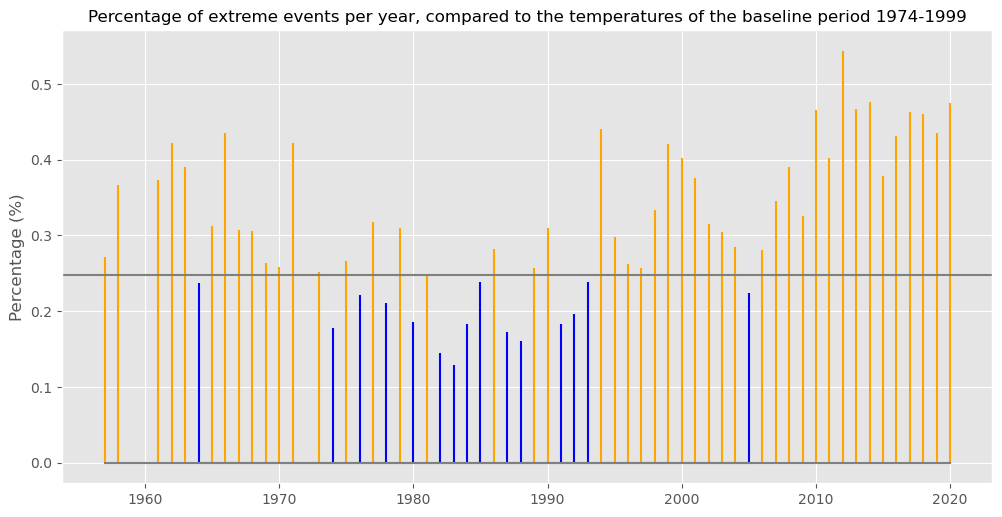

In [48]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

# plot years with percentage of extreme events above baseline
ax1 = markers, stemlines1, baseline = plt.stem(above_baseline.index, above_baseline.extreme_percentage.values, markerfmt=' ', basefmt='grey')
ax1 = plt.setp(stemlines1, color='orange')

# plot years with percentage of extreme events below baseline
ax2 = markers, stemlines, baseline = plt.stem(below_baseline.index, below_baseline.extreme_percentage.values, markerfmt=' ', basefmt='grey')
ax2 = plt.setp(stemlines, color='blue')

# plot the average percentage of extreme temperature events of the baseline
ax3 = plt.axhline(baseline_heat_mean, color='grey')

# set tick params
ax.tick_params(axis='both', labelsize=10)

# set label params
ax.set_xlabel(None)
ax.set_ylabel('Percentage (%)', size=12)

# set title
ax.set_title('Percentage of extreme events per year, compared to the temperatures of the baseline period 1974-1999', size=12)

plt.savefig('./graphs/extreme_events.svg')
plt.show()

### General conclusion

* The discernible pattern reveals a heightened prevalence of extreme events before 1970, followed by a subsequent 23-year period characterized by a lower incidence. However, a discernible shift occurred thereafter, with a gradual increase leading to a localized peak in 2012.

* When juxtaposed with antecedent graphical representations, it becomes evident that occurrences of extreme heat events consistently surpass the established baseline during corresponding intervals. Moreover, since 2006, there has been a persistent upward trajectory in the frequency of these events.

> ## Precipitation

In summary, we could say that the average temperature continue rising from the middle 90's till now and it is an after effect of the global warming and the human intervention. The results are more droughs, unprecedented rainfalls, floods and the outbreak of forest fires across Greece. So, for this reason we must also consider the extreme weather phenomenon of precipitation to see if it is affected by the  rising of temperatures.

* We are interested in whether precipitation becomes more intense over time
* To see this, we will count the total rainfall over the year and the number of rainy days in each year
* Then, by dividing the rainfall by the number of rainy days, we will get an indication of whether we have rain in more concentrated bursts
* We will then create a plot showing the volume of rainfall per rainy day over the years
* On the plot we will overlay the 10-year rolling average

In [49]:
noaa.head()

,date,prcp,tavg,tmax,tmin,max_temperature,min_temperature,daily_rainfall
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN


### Find count the total rainfall over the year and the number of rainy days in each year

In [50]:
# count the total rainfall over the year
total_rainfall = noaa.groupby(noaa.date.dt.year)['prcp'].sum()

total_rainfall

date
1955    547.0
1956    281.3
1957    303.2
1958    350.0
1959    214.0
        ...  
2016    243.6
2017    303.5
2018    379.2
2019    570.0
2020    210.4
Name: prcp, Length: 66, dtype: float64

In [51]:
# count the number of rainy days in each year
rainy_days = noaa.groupby(noaa.date.dt.year)['prcp'].apply(lambda x: x[x > 0.0].count())

rainy_days

date
1955    68
1956    52
1957    73
1958    68
1959    62
        ..
2016    38
2017    47
2018    53
2019    58
2020    38
Name: prcp, Length: 66, dtype: int64

In [52]:
# pass the values into a dictionary
dict_rain = {'total_rainfall': total_rainfall, 'rainy_days': rainy_days}

# use the dictionary to create the dataframe
precipitation = pd.DataFrame(data=dict_rain)

#preview
precipitation

,total_rainfall,rainy_days
date,,
1955,547.0,68
1956,281.3,52
1957,303.2,73
1958,350.0,68
1959,214.0,62
...,...,...
2016,243.6,38
2017,303.5,47
2018,379.2,53


### Find an indication of whether we are getting rain in more concentrated bursts

* We will do that by dividing the rainfall by the number of rainy days to create the indication
* Then we will calculate the 10 years rolling average of the indication

In [53]:
# divide the total rainfall by the number of rainy days
precipitation['indication'] = precipitation['total_rainfall']/precipitation['rainy_days']

# preview
precipitation.head()

,total_rainfall,rainy_days,indication
date,,,
1955,547.0,68,8.044118
1956,281.3,52,5.409615
1957,303.2,73,4.153425
1958,350.0,68,5.147059
1959,214.0,62,3.451613


In [54]:
# calculate the 10 years rolling average of the indication
precipitation['rolling_avg_10'] = precipitation['indication'].rolling(window=10,min_periods=1).mean()

# preview
precipitation.head()

,total_rainfall,rainy_days,indication,rolling_avg_10
date,,,,
1955,547.0,68,8.044118,8.044118
1956,281.3,52,5.409615,6.726867
1957,303.2,73,4.153425,5.869053
1958,350.0,68,5.147059,5.688554
1959,214.0,62,3.451613,5.241166


### Plot the graph

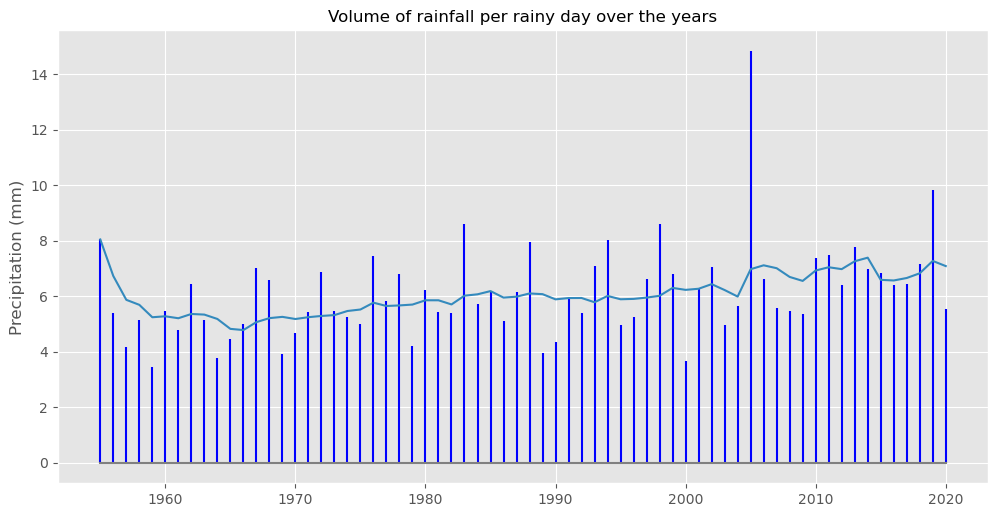

In [55]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

# plot the volume of rainfall per rainy day over the years
ax1 = plt.stem(precipitation.index, precipitation.indication, markerfmt=' ', linefmt='blue', basefmt='grey')

# plot the 10-year rolling average
ax2 = precipitation.rolling_avg_10.plot()

# set tick params
ax.tick_params(axis='both', labelsize=10)

# set label params
ax.set_xlabel(None)
ax.set_ylabel('Precipitation (mm)', size=12)

# set title
ax.set_title('Volume of rainfall per rainy day over the years', size=12)

plt.savefig('./graphs/precipitation.svg')
plt.show()

### General conclusion

* The graph depicts the annual rainfall volume on days with precipitation, calculated by dividing the total annual rainfall by the count of rainy days each year.
* The light blue line on the graph represents the 10-year rolling average of the aforementioned rainfall-to-rainy days ratio.
* Analysis of the blue line reveals a consistent upward trend, implying an increase in the amount of rainfall per rainy day over the years. This trend is likely associated with a reduction in the frequency of rainy days, possibly influenced by the warming climate.